# Importing Required Libraries 

In [279]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from warnings import filterwarnings
filterwarnings('ignore')

## Reading The Content CSV File

In [280]:
import pandas as pd
df = pd.read_csv("C:/Users/Logambal/Downloads/Content.csv")

In [281]:
df.head()

,Unnamed: 0,Content ID,User ID,Type,Category,URL
0,0,97522e57-d9ab-4bd6-97bf-c24d952602d2,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,Studying,https://socialbuzz.cdn.com/content/storage/975...
1,1,9f737e0a-3cdd-4d29-9d24-753f4e3be810,beb1f34e-7870-46d6-9fc7-2e12eb83ce43,photo,healthy eating,https://socialbuzz.cdn.com/content/storage/9f7...
2,2,230c4e4d-70c3-461d-b42c-ec09396efb3f,a5c65404-5894-4b87-82f2-d787cbee86b4,photo,healthy eating,https://socialbuzz.cdn.com/content/storage/230...
3,3,356fff80-da4d-4785-9f43-bc1261031dc6,9fb4ce88-fac1-406c-8544-1a899cee7aaf,photo,technology,https://socialbuzz.cdn.com/content/storage/356...
4,4,01ab84dd-6364-4236-abbb-3f237db77180,e206e31b-5f85-4964-b6ea-d7ee5324def1,video,food,https://socialbuzz.cdn.com/content/storage/01a...


In [282]:
df.tail()

,Unnamed: 0,Content ID,User ID,Type,Category,URL
995,995,b4cef9ef-627b-41d7-a051-5961b0204ebb,5b62e10e-3c19-4d28-a57c-e9bdc3d6758d,video,public speaking,NaN
996,996,7a79f4e4-3b7d-44dc-bdef-bc990740252c,4fe420fa-a193-4408-bd5d-62a020233609,GIF,technology,https://socialbuzz.cdn.com/content/storage/7a7...
997,997,435007a5-6261-4d8b-b0a4-55fdc189754b,35d6a1f3-e358-4d4b-8074-05f3b7f35c2a,audio,veganism,https://socialbuzz.cdn.com/content/storage/435...
998,998,4e4c9690-c013-4ee7-9e66-943d8cbd27b7,b9bcd994-f000-4f6b-87fc-caae08acfaa1,GIF,culture,https://socialbuzz.cdn.com/content/storage/4e4...
999,999,75d6b589-7fae-4a6d-b0d0-752845150e56,b8c653b5-0118-4d7e-9bde-07c2de90f0ff,audio,technology,https://socialbuzz.cdn.com/content/storage/75d...


In [283]:
df.shape

(1000, 6)

In [284]:
df.isnull().sum()

Unnamed: 0      0
Content ID      0
User ID         0
Type            0
Category        0
URL           199
dtype: int64

In [285]:
df['Content_Type'] = df['Type']

In [286]:
df = df.drop(columns = ["Unnamed: 0","URL","User ID","Type"],axis=1)

In [287]:
df.head()

,Content ID,Category,Content_Type
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,Studying,photo
1,9f737e0a-3cdd-4d29-9d24-753f4e3be810,healthy eating,photo
2,230c4e4d-70c3-461d-b42c-ec09396efb3f,healthy eating,photo
3,356fff80-da4d-4785-9f43-bc1261031dc6,technology,photo
4,01ab84dd-6364-4236-abbb-3f237db77180,food,video


### Feature Engineering

In [288]:
df["Content_Type"].unique()

array(['photo', 'video', 'GIF', 'audio'], dtype=object)

In [289]:
df["Category"].unique()

array(['Studying', 'healthy eating', 'technology', 'food', 'cooking',
       'dogs', 'soccer', 'public speaking', 'science', 'tennis', 'travel',
       'fitness', 'education', 'studying', 'veganism', 'Animals',
       'animals', 'culture', '"culture"', 'Fitness', '"studying"',
       'Veganism', '"animals"', 'Travel', '"soccer"', 'Education',
       '"dogs"', 'Technology', 'Soccer', '"tennis"', 'Culture', '"food"',
       'Food', '"technology"', 'Healthy Eating', '"cooking"', 'Science',
       '"public speaking"', '"veganism"', 'Public Speaking', '"science"'],
      dtype=object)

In [290]:
df["Content_Type"].value_counts()

Content_Type
photo    261
video    259
GIF      244
audio    236
Name: count, dtype: int64

In [291]:
df["Category"].value_counts()

Category
technology           71
animals              67
travel               67
culture              63
science              63
fitness              61
food                 61
healthy eating       61
cooking              60
soccer               58
tennis               58
education            57
dogs                 56
studying             55
veganism             48
public speaking      48
Fitness               5
Animals               4
Science               4
"soccer"              3
"culture"             3
Soccer                3
"dogs"                2
Education             2
Studying              2
Travel                2
Food                  2
"veganism"            1
"public speaking"     1
Public Speaking       1
"technology"          1
"cooking"             1
Healthy Eating        1
"studying"            1
"food"                1
Culture               1
"tennis"              1
Technology            1
"animals"             1
Veganism              1
"science"             1
Name: c

In [292]:
Categories = {
    'Fitness': "fitness",
    'Animals' : "animals",
    '"animals"' : "animals",
    '"science"' : "science",
    "Science" : "science",
    '"soccer"' : "soccer",
    'Soccer' : "soccer",
    'Culture' : "culture",
    '"culture"' : "culture",
    '"dogs"' : "dogs",
    'Education' : "education",
    '"studying"': "studying",
    'Studying': "studying",
    'Travel': "travel",
    '"food"': "food",
    'Food': "food",
    'Veganism': "veganism",
    '"veganism"': "veganism",
    'Public Speaking': "public speaking",
    '"public speaking"': "public speaking",
    'Technology': "technology",
    '"technology"': "technology",
    '"cooking"': "cooking",
    'Healthy Eating': "healthy eating",
    '"tennis"': "tennis"
}

In [293]:
df['Category'] = df['Category'].replace(Categories)

In [294]:
df["Category"].value_counts()

Category
technology         73
animals            72
travel             69
science            68
culture            67
fitness            66
food               64
soccer             64
healthy eating     62
cooking            61
tennis             59
education          59
studying           58
dogs               58
public speaking    50
veganism           50
Name: count, dtype: int64

In [347]:
df["Category"].value_counts(normalize=True)

Category
technology         0.073
animals            0.072
travel             0.069
science            0.068
culture            0.067
fitness            0.066
food               0.064
soccer             0.064
healthy eating     0.062
cooking            0.061
tennis             0.059
education          0.059
studying           0.058
dogs               0.058
public speaking    0.050
veganism           0.050
Name: proportion, dtype: float64

In [295]:
df["Category"].unique()

array(['studying', 'healthy eating', 'technology', 'food', 'cooking',
       'dogs', 'soccer', 'public speaking', 'science', 'tennis', 'travel',
       'fitness', 'education', 'veganism', 'animals', 'culture'],
      dtype=object)

In [296]:
df.head()

,Content ID,Category,Content_Type
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,studying,photo
1,9f737e0a-3cdd-4d29-9d24-753f4e3be810,healthy eating,photo
2,230c4e4d-70c3-461d-b42c-ec09396efb3f,healthy eating,photo
3,356fff80-da4d-4785-9f43-bc1261031dc6,technology,photo
4,01ab84dd-6364-4236-abbb-3f237db77180,food,video


### Exploratory Data Analysis(EDA)

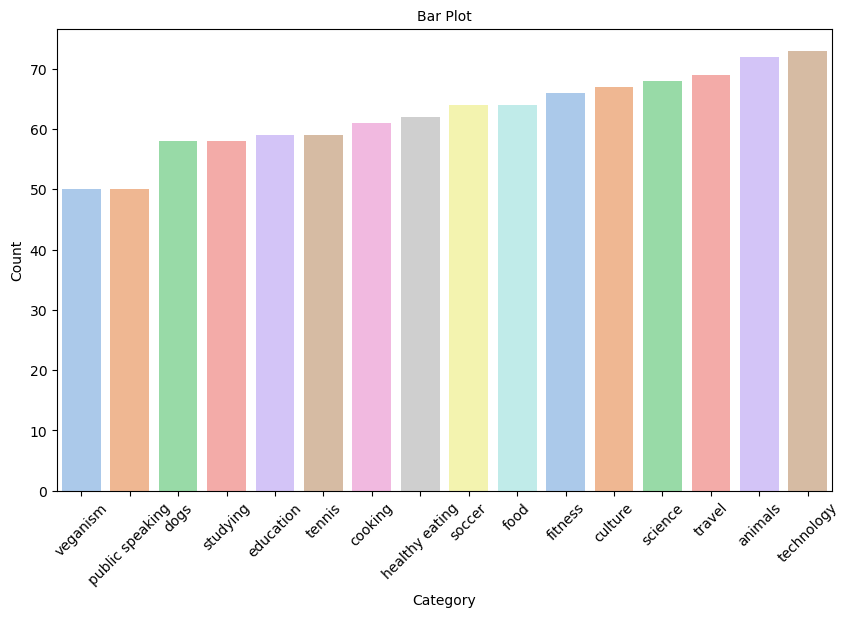

In [297]:
# Create a count plot
plt.figure(figsize=(10, 6))  
ax = sns.countplot(data=df, x='Category', order=df['Category'].value_counts().index[::-1], palette="pastel")
plt.xticks(rotation=45) 
plt.title('Count of Categories')
plt.xlabel('Category')
plt.ylabel('Count')

# Add a title for the plot
ax.set_title('Bar Plot', fontsize=10)

plt.show()

### Inference:
1. Based on the above bar chart, we can conclude that the technology category has the highest count overall, accounting for 7.3%, while veganism has the lowest count at 5%.

### Recommendations:

1. **Diversify Content:** Expand beyond technology to cater to diverse interests.
2. **Engage Niche Audiences:** Focus on specialized content for the veganism niche.
3. **Explore Emerging Trends:** Stay updated and tap into rising interests.
4. **Optimize Content:** Analyze and tailor content for maximum engagement.

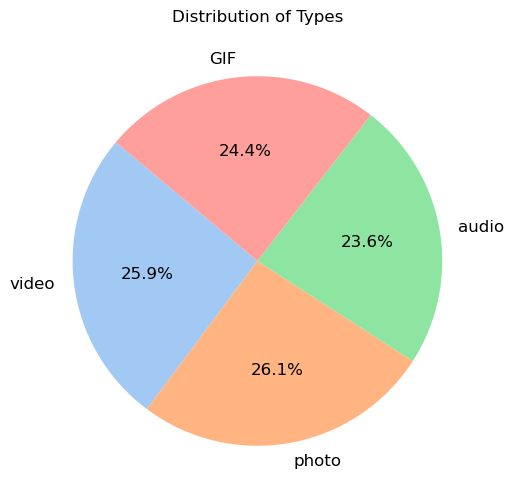

In [298]:
# Count occurrences of each type and sort them in descending order
type_counts = df['Content_Type'].value_counts().sort_index(ascending=False)

# Create a pie chart
plt.figure(figsize=(6,6))  # Adjust the figure size as needed
plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"), textprops={'fontsize': 12})
plt.title('Distribution of Types')
plt.show()


### Inference
1. Based on the above pie chart, we conclude that the photo content type has the highest count at 26.1%, while the audio type has the least count at 23.6%.

### Recommendations:
1. **Enhance Audio Content:** Given its lower count, focus on improving the quality and appeal of audio content to attract more engagement.
2. **Leverage Visual Content:** Capitalize on the popularity of photo content by creating visually compelling and shareable material.
3. **Diversify Content Formats:** Explore other content types such as video or interactive content to offer variety and cater to diverse audience preferences.
4. **Analyze Audience Preferences:** Continuously monitor audience feedback and engagement metrics to refine content strategies and prioritize high-performing content types.

In [299]:
df2 = pd.read_csv("C:/Users/Logambal/Downloads/Reactions.csv")

In [300]:
df2.head()

,Unnamed: 0,Content ID,User ID,Type,Datetime
0,0,97522e57-d9ab-4bd6-97bf-c24d952602d2,NaN,NaN,2021-04-22 15:17:15
1,1,97522e57-d9ab-4bd6-97bf-c24d952602d2,5d454588-283d-459d-915d-c48a2cb4c27f,disgust,2020-11-07 09:43:50
2,2,97522e57-d9ab-4bd6-97bf-c24d952602d2,92b87fa5-f271-43e0-af66-84fac21052e6,dislike,2021-06-17 12:22:51
3,3,97522e57-d9ab-4bd6-97bf-c24d952602d2,163daa38-8b77-48c9-9af6-37a6c1447ac2,scared,2021-04-18 05:13:58
4,4,97522e57-d9ab-4bd6-97bf-c24d952602d2,34e8add9-0206-47fd-a501-037b994650a2,disgust,2021-01-06 19:13:01


In [301]:
df2.tail()

,Unnamed: 0,Content ID,User ID,Type,Datetime
25548,25548,75d6b589-7fae-4a6d-b0d0-752845150e56,80c9ce48-46f9-4f5e-b3ca-3b698fc2e949,dislike,2020-06-27 09:46:48
25549,25549,75d6b589-7fae-4a6d-b0d0-752845150e56,2bd9c167-e06c-47c1-a978-3403d6724606,intrigued,2021-02-16 17:17:02
25550,25550,75d6b589-7fae-4a6d-b0d0-752845150e56,NaN,interested,2020-09-12 03:54:58
25551,25551,75d6b589-7fae-4a6d-b0d0-752845150e56,5ffd8b51-164e-47e2-885e-8b8c46eb63ed,worried,2020-11-04 20:08:31
25552,25552,75d6b589-7fae-4a6d-b0d0-752845150e56,4edc3d1a-a7d9-4db6-89c3-f784d9954172,cherish,2021-01-04 04:55:11


In [302]:
df2.shape

(25553, 5)

In [303]:
df2.isnull().sum()

Unnamed: 0       0
Content ID       0
User ID       3019
Type           980
Datetime         0
dtype: int64

In [304]:
df2.isnull().sum()

Unnamed: 0       0
Content ID       0
User ID       3019
Type           980
Datetime         0
dtype: int64

In [305]:
df2 = df2.dropna()

In [306]:
df2.isnull().sum()

Unnamed: 0    0
Content ID    0
User ID       0
Type          0
Datetime      0
dtype: int64

In [307]:
df2.shape

(22534, 5)

In [308]:
df2.duplicated().sum()

0

In [309]:
df2 = df2.drop(columns = ["Unnamed: 0","User ID","Datetime"],axis = 1)

In [311]:
df2['Type'].unique()

array(['disgust', 'dislike', 'scared', 'interested', 'peeking', 'cherish',
       'hate', 'indifferent', 'super love', 'worried', 'like', 'heart',
       'want', 'intrigued', 'love', 'adore'], dtype=object)

In [313]:
type_len = df2['Type'].unique()
print(len(type_len))

16


In [314]:
df2['Type'].value_counts()

Type
heart          1497
peeking        1438
scared         1436
adore          1427
interested     1425
hate           1420
love           1411
disgust        1406
dislike        1396
want           1396
super love     1393
like           1391
indifferent    1385
cherish        1380
worried        1379
intrigued      1354
Name: count, dtype: int64

In [350]:
df2['Type'].value_counts(normalize=True)

Type
heart          0.066433
peeking        0.063815
scared         0.063726
adore          0.063327
interested     0.063238
hate           0.063016
love           0.062616
disgust        0.062395
dislike        0.061951
want           0.061951
super love     0.061818
like           0.061729
indifferent    0.061463
cherish        0.061241
worried        0.061196
intrigued      0.060087
Name: proportion, dtype: float64

### Inference
1. Based on the above bar chart, we can conclude that the **Heart** reaction type has the highest count overall, accounting for 6.6%, while the **Intrigued** reaction type has the lowest count at 6%.

### Recommendations:
1. **Encourage Engagement:** Since the "heart" reaction type is popular, encourage users to express their appreciation by providing engaging and valuable content.
2. **Improve Visibility:** To boost engagement with lesser-used reaction types like "intrigued", highlight their availability and encourage users to explore and utilize them.
3. **Analyze User Feedback:** Continuously monitor user feedback to understand preferences and tailor content strategies to resonate with the audience.
4. **Experiment with Content:** Experiment with different types of content and gauge audience reactions to identify what resonates best and optimize engagement.

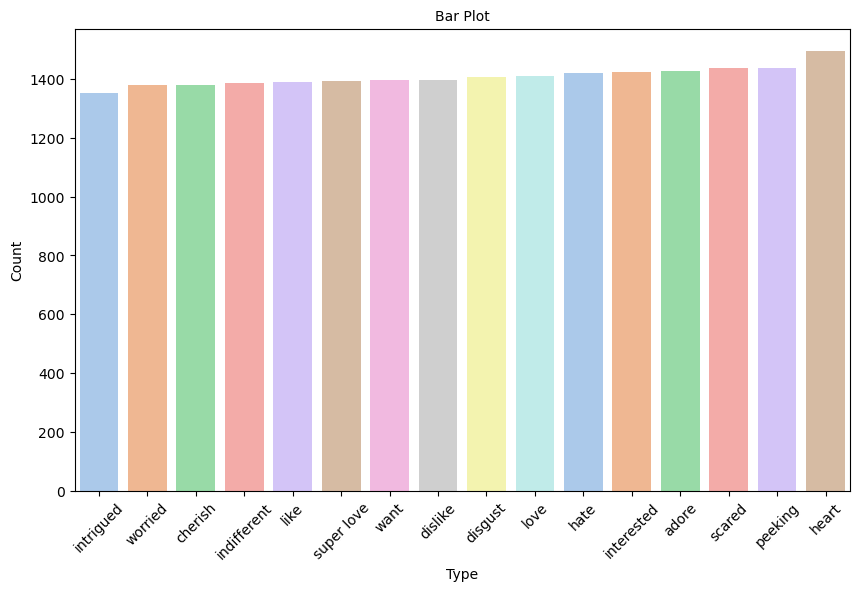

In [315]:
# Create a count plot
plt.figure(figsize=(10, 6))  
ax = sns.countplot(data=df2, x='Type', order=df2['Type'].value_counts().index[::-1], palette="pastel")
plt.xticks(rotation=45) 
plt.title('Count of Type')
plt.xlabel('Type')
plt.ylabel('Count')

# Add a title for the plot
ax.set_title('Bar Plot', fontsize=10)

plt.show()

In [316]:
df3 = pd.read_csv("C:/Users/Logambal/Downloads/ReactionTypes.csv")

In [317]:
df3.head()

,Unnamed: 0,Type,Sentiment,Score
0,0,heart,positive,60
1,1,want,positive,70
2,2,disgust,negative,0
3,3,hate,negative,5
4,4,interested,positive,30


In [318]:
df3.tail()

,Unnamed: 0,Type,Sentiment,Score
11,11,dislike,negative,10
12,12,intrigued,positive,45
13,13,peeking,neutral,35
14,14,scared,negative,15
15,15,worried,negative,12


In [319]:
df3.shape

(16, 4)

In [320]:
df3.isnull().sum()

Unnamed: 0    0
Type          0
Sentiment     0
Score         0
dtype: int64

In [321]:
df3.duplicated().sum()

0

In [322]:
df3 = df3.drop("Unnamed: 0",axis=1)

In [323]:
df3['Type'].unique()

array(['heart', 'want', 'disgust', 'hate', 'interested', 'indifferent',
       'love', 'super love', 'cherish', 'adore', 'like', 'dislike',
       'intrigued', 'peeking', 'scared', 'worried'], dtype=object)

In [324]:
type_len = df3['Type'].unique()
print(len(type_len))

16


In [325]:
df3['Type'].value_counts()

Type
heart          1
want           1
disgust        1
hate           1
interested     1
indifferent    1
love           1
super love     1
cherish        1
adore          1
like           1
dislike        1
intrigued      1
peeking        1
scared         1
worried        1
Name: count, dtype: int64

In [326]:
df3['Sentiment'].unique()

array(['positive', 'negative', 'neutral'], dtype=object)

In [327]:
df3['Sentiment'].value_counts()

Sentiment
positive    9
negative    5
neutral     2
Name: count, dtype: int64

In [328]:
df3['Score'].value_counts()

Score
70    2
60    1
0     1
5     1
30    1
20    1
65    1
75    1
72    1
50    1
10    1
45    1
35    1
15    1
12    1
Name: count, dtype: int64

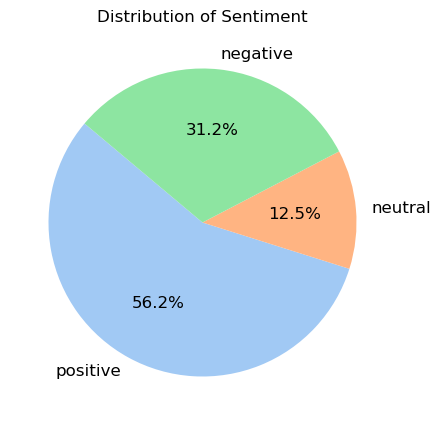

In [329]:
# Count occurrences of each Sentiment and sort them in descending order
type_counts = df3['Sentiment'].value_counts().sort_index(ascending=False)

# Create a pie chart
plt.figure(figsize=(5,5))  
plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', 
        startangle=140, colors=sns.color_palette("pastel"), textprops={'fontsize': 12})
plt.title('Distribution of Sentiment')
plt.show()


### Inference
1. Based on the above pie chart, we can conclude that **positive sentiment** accounts for 56.2%, while **neutral sentiment** is notably lower at 12.5%.

### Recommendations:
1. **Leverage Positive Sentiment:** Given the dominance of positive sentiment, capitalize on this by crafting content that elicits positive emotions and responses from the audience.
2. **Address Neutral Sentiment:** Although neutral sentiment is lower, it's essential to understand the reasons behind it. Consider analyzing feedback and engaging with the audience to address any concerns or areas for improvement.
3. **Content Personalization:** Tailor content to resonate with the predominant positive sentiment while ensuring inclusivity and relevance for those expressing neutral sentiments.
4. **Monitor Sentiment Trends:** Continuously monitor sentiment trends over time to adapt content strategies and maintain alignment with audience preferences and attitudes.

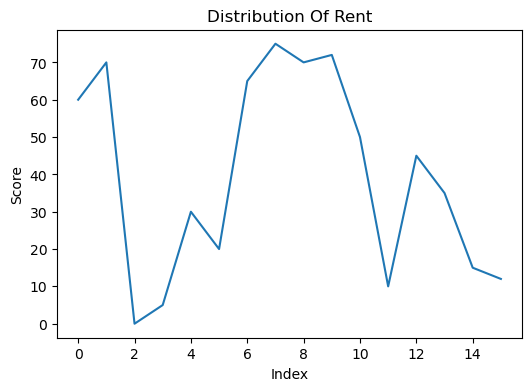

In [330]:
# Create a line plot
plt.figure(figsize=(6,4))
sns.lineplot(data=df3, x=df3.index, y='Score')
plt.title('Distribution Of Rent')
plt.xlabel('Index')
plt.ylabel('Score')
plt.show()

In [331]:
# Merge the dataframes on the 'Type' column
merged_df = pd.merge(df2, df3, on='Type')
# Display the merged dataframe
merged_df

,Content ID,Type,Sentiment,Score
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,negative,0
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,dislike,negative,10
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,scared,negative,15
3,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,negative,0
4,97522e57-d9ab-4bd6-97bf-c24d952602d2,interested,positive,30
...,...,...,...,...
22529,75d6b589-7fae-4a6d-b0d0-752845150e56,worried,negative,12
22530,75d6b589-7fae-4a6d-b0d0-752845150e56,dislike,negative,10
22531,75d6b589-7fae-4a6d-b0d0-752845150e56,intrigued,positive,45
22532,75d6b589-7fae-4a6d-b0d0-752845150e56,worried,negative,12


In [332]:
# Merge the dataframes on the 'Content ID' column
final_df = pd.merge(df, merged_df, on='Content ID')
# Display the merged dataframe
final_df

,Content ID,Category,Content_Type,Type,Sentiment,Score
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,studying,photo,disgust,negative,0
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,studying,photo,dislike,negative,10
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,studying,photo,scared,negative,15
3,97522e57-d9ab-4bd6-97bf-c24d952602d2,studying,photo,disgust,negative,0
4,97522e57-d9ab-4bd6-97bf-c24d952602d2,studying,photo,interested,positive,30
...,...,...,...,...,...,...
22529,75d6b589-7fae-4a6d-b0d0-752845150e56,technology,audio,worried,negative,12
22530,75d6b589-7fae-4a6d-b0d0-752845150e56,technology,audio,dislike,negative,10
22531,75d6b589-7fae-4a6d-b0d0-752845150e56,technology,audio,intrigued,positive,45
22532,75d6b589-7fae-4a6d-b0d0-752845150e56,technology,audio,worried,negative,12


In [336]:
category_scores = final_df.groupby('Category')['Score'].sum()
categories = category_scores.sort_values(ascending=False)
categories

Category
animals            68624
science            65405
healthy eating     63138
technology         63035
food               61598
culture            60663
travel             59358
cooking            59174
soccer             53216
education          52759
fitness            50835
studying           49442
dogs               48398
tennis             46185
veganism           45901
public speaking    45751
Name: Score, dtype: int64

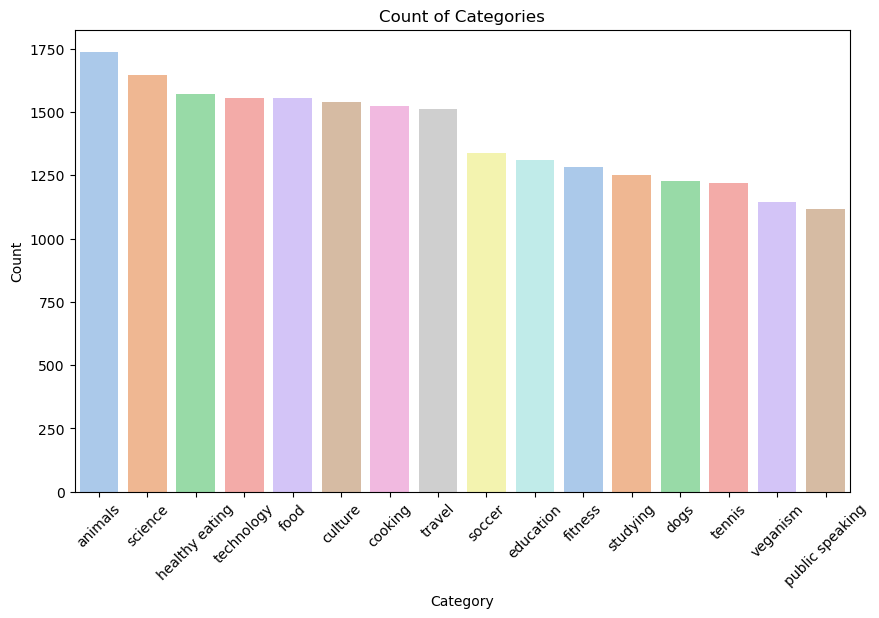

In [346]:
# Get the count of occurrences of each category
category_counts = final_df['Category'].value_counts()

# Create a count plot
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
sns.countplot(data=final_df, x='Category', order=category_counts.index, palette="pastel")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.title('Count of Categories')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

In [337]:
top_5_categories = categories.head(5)
print("Top 5 performing categories:")
print(top_5_categories)

Top 5 performing categories:
Category
animals           68624
science           65405
healthy eating    63138
technology        63035
food              61598
Name: Score, dtype: int64


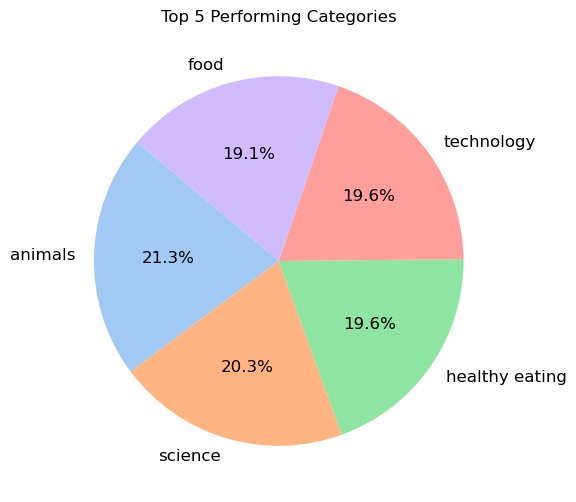

In [344]:
# Plot a pie chart for the top 5 performing categories
plt.figure(figsize=(6, 6))
plt.pie(top_5_categories, labels=top_5_categories.index, autopct='%1.1f%%', 
        startangle=140, colors=sns.color_palette("pastel"), textprops={'fontsize': 12})
plt.title('Top 5 Performing Categories')
plt.show()

### The top 5 categories are as follows:
1. Animals - 21.3%
2. Science - 20.3%
3. Healthy Eating - 19.6%
4. Technology - 19.6%
5. Food - 19.1%

### Recommendations:
1. **Leverage Popular Categories:** Focus on producing high-quality content in the top-performing categories to maintain engagement and interest.
2. **Explore Synergies:** Look for opportunities to intersect popular categories. For instance, combining science with healthy eating could yield informative content on nutrition or wellness.
3. **Audience Interaction:** Encourage audience interaction and feedback to better understand their preferences within these top categories.
4. **Diversification:** While focusing on popular categories is essential, consider diversifying content to maintain a balanced and engaging content strategy. Explore emerging trends and niche interests to expand audience reach and engagement.

<h1 style="text-align:center;">Overall Performance</h1>

## Overall Inference:
- **Top Performing Categories:** The analysis revealed that the top performing categories are animals, science, healthy eating, technology, and food. These categories garner the highest engagement and interest among the audience.
- **Sentiment Analysis:** Positive sentiment dominates, indicating a favorable response to the content. However, there is a notable presence of neutral sentiment, suggesting areas for potential improvement or further exploration.
- **Content Types:** The analysis suggests that photo content is the most prevalent, followed by audio content. However, there may be opportunities to enhance audio content to increase its engagement.
- **Reaction Types:** The "heart" reaction type is the most frequently used, indicating a positive response from the audience. Other reaction types such as "intrigued" are less utilized, presenting opportunities to encourage diversity in audience engagement.

## Overall Recommendations:
1. **Content Optimization:** Continue to produce high-quality content within the top performing categories to maintain engagement levels. Explore diverse topics within these categories to cater to various interests within the audience.
2. **Engagement Strategies:** Encourage audience interaction and feedback to gain insights into their preferences and interests. Utilize polls, surveys, and Q&A sessions to foster community engagement.
3. **Sentiment Analysis:** Regularly monitor sentiment trends to gauge audience satisfaction and identify areas for improvement. Address any concerns or issues raised by neutral sentiment through proactive communication and action.
4. **Content Diversity:** While focusing on popular categories, maintain a balance by diversifying content types and formats. Explore emerging trends and niche interests to expand audience reach and engagement.
5. **Reaction Diversity:** Promote the use of diverse reaction types to encourage varied forms of audience engagement. Educate the audience on the availability and significance of different reaction options to foster inclusivity and diversity in engagement.

By implementing these recommendations, it's possible to optimize content strategy, enhance audience engagement, and foster a thriving and inclusive community around the content.